In [20]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


## read data

In [21]:
df = pd.read_csv("../data/pass_student.csv")
df

,Pass,Hours
0,0,0.50
1,0,0.75
2,0,1.00
3,0,1.25
4,0,1.50
5,0,1.75
6,1,1.75
7,0,2.00
8,1,2.25
9,0,2.50


## Get X and Y

In [22]:
X = np.array([df["Hours"]], dtype=float)
Y = df["Pass"]

ones = np.ones((1, X.shape[1]))
X = np.concatenate((ones, X), axis=0)
X

array([[1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ],
       [0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 1.75, 2.  , 2.25, 2.5 , 2.75,
        3.  , 3.25, 3.5 , 4.  , 4.25, 4.5 , 4.75, 5.  , 5.5 ]])

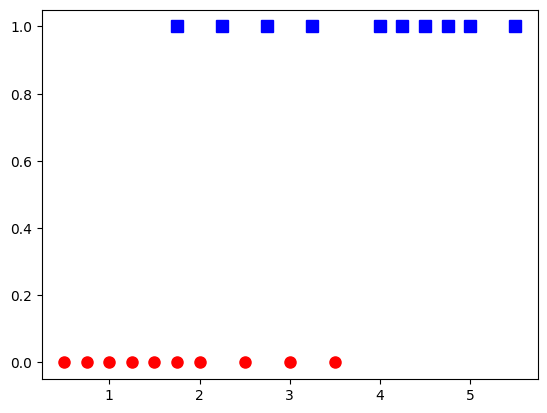

In [23]:
X0 = X[1, np.where(Y==0)][0]
Y0 = Y[Y==0]

X1 = X[1, np.where(Y==1)][0]
Y1= Y[Y==1]

plt.plot(X0, Y0, "ro", markersize=8)
plt.plot(X1, Y1, "bs", markersize=8)

## Logistic things

In [26]:
def sigmoid(s):
    return 1/(1+np.exp(-s))

def logistic_function(X, Y, w_init, eta, tol=1e-4, max_count=10000):
    w = [w_init]
    N = X.shape[1]
    d = X.shape[0]
    count = 0
    check_w_after = 20

    while (count < max_count):
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = Y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))

            w_new = w[-1] + eta * (yi - zi)*xi
            count += 1

            if (count % check_w_after == 0):
                if (np.linalg.norm(w_new - w[-check_w_after]) < tol):
                    return w
                
            w.append(w_new)

    return w

## Get w 

In [27]:
eta = 0.05

d = X.shape[0]
w_init = np.random.randn(d, 1)

w = logistic_function(X, Y, w_init, eta)
w[-1]

array([[-4.13690417],
       [ 1.42050554]])

In [28]:
sigmoid(np.dot(w[-1].T, X))

array([[0.03147285, 0.04429722, 0.06201262, 0.08617396, 0.11855916,
        0.16097121, 0.16097121, 0.21485702, 0.2807455 , 0.35763579,
        0.44262535, 0.53111286, 0.61768621, 0.69738267, 0.8242075 ,
        0.86991918, 0.9051128 , 0.93153411, 0.95099673, 0.97529842]])

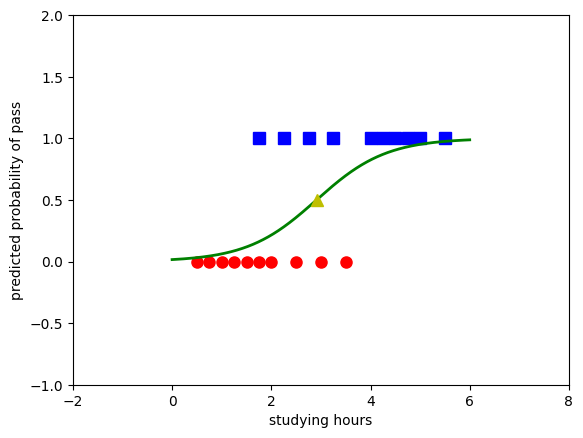

In [30]:
X0 = X[1, np.where(Y == 0)][0]
y0 = Y[Y == 0]
X1 = X[1, np.where(Y == 1)][0]
y1 = Y[Y == 1]

plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)

xx = np.linspace(0, 6, 1000)
w0 = w[-1][0][0]
w1 = w[-1][1][0]
threshold = -w0/w1
yy = sigmoid(w0 + w1*xx)
plt.axis([-2, 8, -1, 2])
plt.plot(xx, yy, 'g-', linewidth = 2)
plt.plot(threshold, .5, 'y^', markersize = 8)
plt.xlabel('studying hours')
plt.ylabel('predicted probability of pass')
plt.show()